Que.

Consider following datasets , do PCA on each datasets and preapare any three classification models.

Datasets:
wine.csv
framingham.csv
claimants.csv
glass.csv
churn.csv`

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df_wine=pd.read_csv("C:/Sunbeam Git/Machine Learning/Machine_Learning/Assignment/Datasets/Wine.csv")
df_fram=pd.read_csv("C:/Sunbeam Git/Machine Learning/Machine_Learning/Assignment/Datasets/framingham.csv")
df_claim=pd.read_csv("C:/Sunbeam Git/Machine Learning/Machine_Learning/Assignment/Datasets/Claimants.csv")
df_glass=pd.read_csv("C:/Sunbeam Git/Machine Learning/Machine_Learning/Assignment/Datasets/Churn.csv")

In [72]:
df_wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [74]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [76]:
df_wine.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

<Axes: xlabel='Proline', ylabel='Count'>

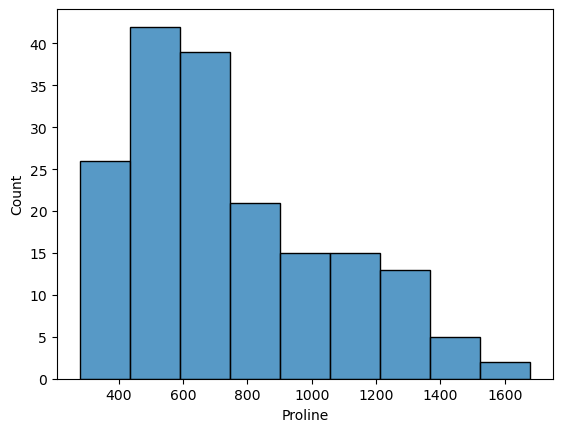

In [78]:
sns.histplot(df_wine['Proline'])

In [79]:
# before scaling
df_wine['Proline'].head()

0    1065
1    1050
2    1185
3    1480
4     735
Name: Proline, dtype: int64

In [89]:
from sklearn.preprocessing import StandardScaler
col=df_wine[['Proline']]
sc=StandardScaler()
sc.fit(col)
# df_wine['Proline']=sc.transform(df_wine['Proline'])

StandardScaler()

In [91]:
df_wine['Proline']=sc.transform(col)

In [93]:
df_wine['Proline'].head()

0    1.013009
1    0.965242
2    1.395148
3    2.334574
4   -0.037874
Name: Proline, dtype: float64

In [95]:
df_wine.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [97]:
X=df_wine.drop('Customer_Segment',axis=1)
y=df_wine['Customer_Segment']

In [105]:
from sklearn.decomposition import PCA

pca=PCA(n_components=1)
x_wine=pca.fit_transform(X)


In [109]:
x_wine=pd.DataFrame(x_wine,columns=['PCA1'])

In [111]:
x_wine

,PCA1
0,27.399375
1,0.453992
2,1.374473
3,13.519194
4,18.196364
...,...
173,-4.705137
174,2.228480
175,20.359856
176,20.338200


In [115]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_wine,y,test_size=0.2)

In [117]:
from sklearn.linear_model import LogisticRegressionCV
model_logistic=LogisticRegressionCV()
model_logistic.fit(x_train,y_train)

LogisticRegressionCV()

In [122]:
y_pred_wine=model_logistic.predict(x_test)

In [124]:
from sklearn.metrics import accuracy_score,classification_report

print(classification_report(y_test,y_pred_wine))

              precision    recall  f1-score   support

           1       0.42      0.50      0.45        10
           2       0.58      0.82      0.68        17
           3       0.00      0.00      0.00         9

    accuracy                           0.53        36
   macro avg       0.33      0.44      0.38        36
weighted avg       0.39      0.53      0.45        36



C:\Users\Vaibhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vaibhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vaibhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
